Some notes on looking at the data:
1. Most entries aren't fully filled out
2. There is more Male data than Female data
3. More of the Female data isn't filled outa
4. There is a definite difference in protein levels when looking at Males vs Females
5. It is more difficult to discern a difference between Sick vs Control
6. However after splitting the Male (and Female) dataset into Sick vs Control, there are some    differences when looking at proteins... in particular V12
7. These differences are more prominent in the Female dataset than the Male one... this may be    because of the smaller data set
8. There definitley seems to be some signal in classifying patients as sick vs control after
   splitting by gender... as evidenced by classifier preformances
9. There are definitely fat finger errors present in the data, I somewhat corrected for this      by filtering out all values below 1
10. There might be some interesting functions to play around with in the usefulFunctions module... in particular the showBoxPlots, createBoxPlot, cleanAndFill, testBinaryClassifier  

Things I still need to look at:
1. Creating bands in terms of age
2. Creating bands in terms of days from diagnosis
3. Doing more corellation analysis
4. Trying out sampling techniques to create richer datasets
5. Try removing some proteins and running classifiers
6. Try tweaking params

All code is commented

In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from numpy.random import normal
import math
import usefulFunctions
from IPython.core.debugger import Tracer

In [2]:
# reading in the data
# think key - value storage
# key - patientId
# value - whole row (including patientID) as a dictionary
# Ex:
# control = {
#                 patientId_1 :  {'id' : 1,
#                                 'type' : 1,
#                                 ...},
#                 patinetId_2 : ...
# }
control = {}
sick = {}
male = {}
female = {}
age = []
months = []

fileName = "Master_PL.xlsx - Master_PL.csv"
table = pd.read_csv(fileName, header=0, 
                    names=["id", "type", "gender", "age", "monthsFromScreening", "protein_BL", "protein_V4",
                          "protein_V6", "protein_V8", "protein_V10", "protein_V12"])

totalRows = len(table.values)

# splitting data into female vs male, control vs sick, plus storing the age and months data
# into arrays so we can look at their distributions later (to understand good age bands)
for row in table.to_dict(orient='records'):
    if row['type'] is not None:
        if row['type'] == 1:
            control[int(row['id'])] = row
        else:
            sick[int(row['id'])] = row
    
    if row['gender'] is not None:
        if row['gender'] == 1:
            female[int(row['id'])] = row
        else:
            male[int(row['id'])] = row

    
    if row['age'] is not None:
        age.append(row['age'])
    
    if row['monthsFromScreening'] is not None:
        months.append(row['monthsFromScreening'])

print "Number of data points that are males : " + str(len(male))
print "Number of data points that are females : " + str(len(female))
print "Number of data points that are control : " + str(len(control))
print "Number of data points that are sick : " + str(len(sick))

Number of data points that are males : 403
Number of data points that are females : 216
Number of data points that are control : 196
Number of data points that are sick : 423


To look at a single protein:
usefulFunctions.showBoxPlots(dataSet1, dataSet2, title="", proteinName="nameOfProtein")

To look at all proteins:
usefulFunctions.showBoxPlots(dataSet1, dataSet2, title="")

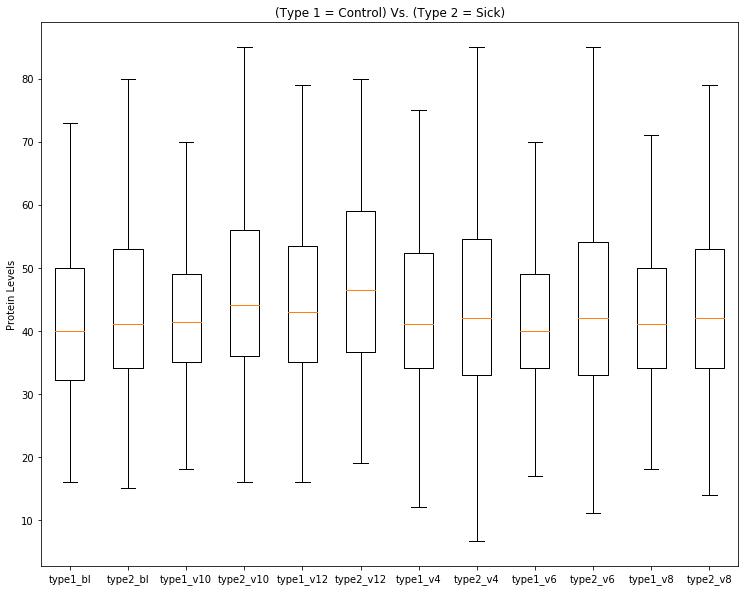

In [3]:
usefulFunctions.showBoxPlots(control, sick, "(Type 1 = Control) Vs. (Type 2 = Sick)")

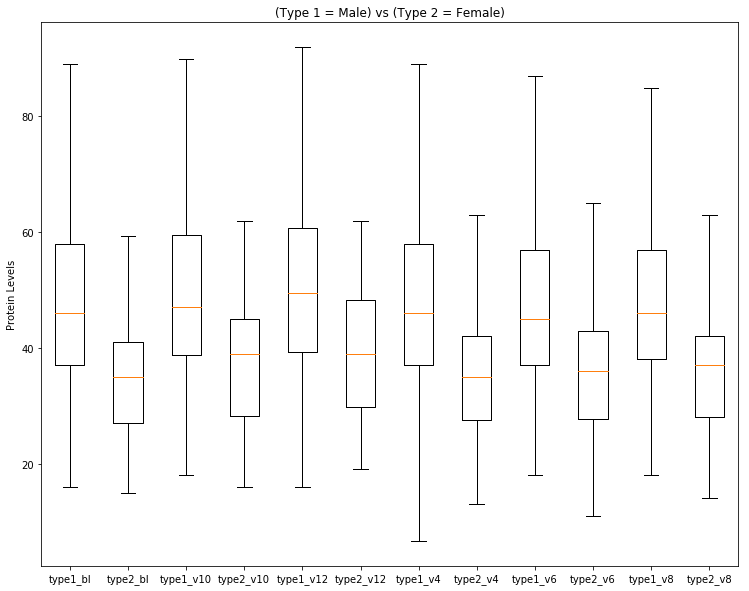

In [4]:
usefulFunctions.showBoxPlots(male, female, "(Type 1 = Male) vs (Type 2 = Female)")

In [5]:
tup = usefulFunctions.combine(male, female, control, sick)
maleSplit = tup[0]
femaleSplit = tup[1]
print "Number of Males that are in the Control : " + str(len(maleSplit[0]))
print "Number of Males that are Sick : " + str(len(maleSplit[1]))
print "Number of Females that are in the Control : " + str(len(femaleSplit[0]))
print "Number of Females that are Sick : " + str(len(femaleSplit[1]))

Number of Males that are in the Control : 126
Number of Males that are Sick : 277
Number of Females that are in the Control : 70
Number of Females that are Sick : 146


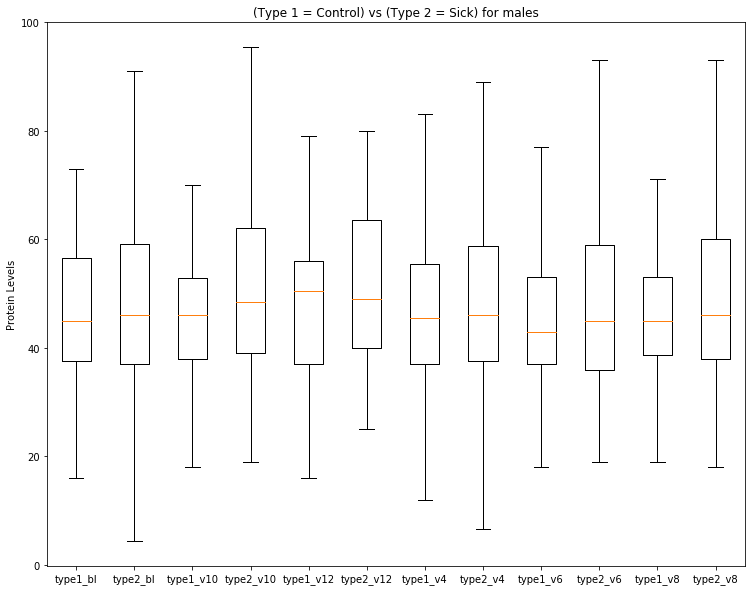

In [6]:
usefulFunctions.showBoxPlots(maleSplit[0], maleSplit[1], "(Type 1 = Control) vs (Type 2 = Sick) for males")

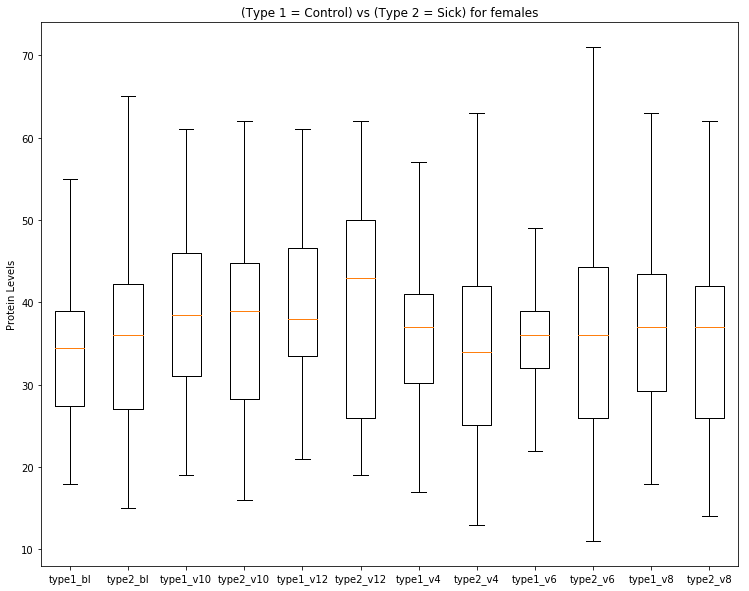

In [7]:
usefulFunctions.showBoxPlots(femaleSplit[0], femaleSplit[1], "(Type 1 = Control) vs (Type 2 = Sick) for females")

Params one can play around with creation of data set for classification: (useful to look at functions to understand these)
1. fill or not fill (attempt to fill in data points that are almost fully complete)
2. k -> # of missing entries there can be for a data point that is going to be filled
2. fix or not fix (attempt to fix fat finger errors)
3. morePoints -> relaxes conditions for filling in points (existence of 30 real entries for a feature for a class -> trust normal distribution parameterized by mean and std of a feature for a class)
4. proteins -> array of protein names to consider when creating vector representations for patient
5. n -> number of trials, which is currently set to the default of 10

There are additionally also params of the classifiers one can play around with

Total Data Points: 403
Number of Training Data Points: 83
Number of Testing Data Points: 42
Accuracy scores: [0.7857142857142857, 0.80952380952380953, 0.80952380952380953, 0.80952380952380953, 0.80952380952380953, 0.80952380952380953, 0.80952380952380953, 0.80952380952380953, 0.83333333333333337, 0.83333333333333337]
Mean Accuracy: 0.811904761905
Median Accuracy: 0.809523809524
ROC Graph for Median trial


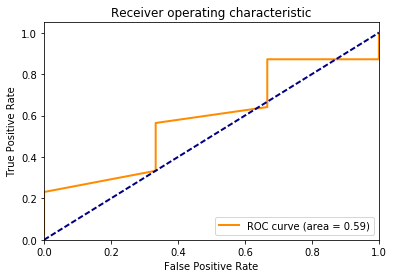

In [10]:
# classifying control vs sick for males
# sick is class 1
# fill = True, k = 1, fix = True, morePoints = False, proteins = None

clf = RandomForestClassifier(n_estimators=30, random_state=1)
print "Total Data Points: " + str(len(maleSplit[0]) + len(maleSplit[1]))
usefulFunctions.testBinaryClassifier(clf, maleSplit[0], maleSplit[1], testSize=0.33)

Total Data Points: 403
Number of Training Data Points: 83
Number of Testing Data Points: 42
Accuracy scores: [0.61904761904761907, 0.6428571428571429, 0.6428571428571429, 0.6428571428571429, 0.6428571428571429, 0.66666666666666663, 0.66666666666666663, 0.66666666666666663, 0.69047619047619047, 0.7142857142857143]
Mean Accuracy: 0.659523809524
Median Accuracy: 0.666666666667
ROC Graph for Median trial


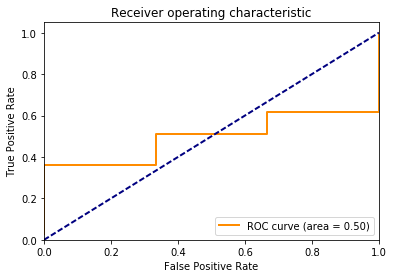

In [13]:
# classifying control vs sick for males
# sick is class 1
# fill = True, k = 1, fix = True, morePoints = False, proteins = None

clf = AdaBoostClassifier(n_estimators=100)
print "Total Data Points: " + str(len(maleSplit[0]) + len(maleSplit[1]))
usefulFunctions.testBinaryClassifier(clf, maleSplit[0], maleSplit[1], k=1, testSize=0.33)

Total Data Points: 216
Number of Training Data Points: 29
Number of Testing Data Points: 15
Accuracy scores: [0.46666666666666667, 0.46666666666666667, 0.46666666666666667, 0.53333333333333333, 0.53333333333333333, 0.53333333333333333, 0.53333333333333333, 0.53333333333333333, 0.59999999999999998, 0.59999999999999998]
Mean Accuracy: 0.526666666667
Median Accuracy: 0.533333333333
ROC Graph for Median trial


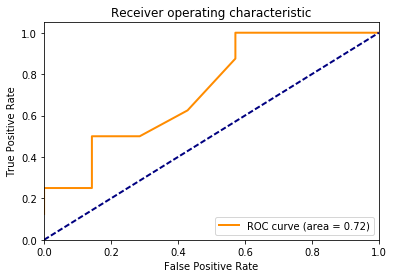

In [14]:
# classifying control vs sick for females
# sick is class 1
# fill = True, k = 2, fix = True, morePoints = False, proteins = None

clf = RandomForestClassifier(n_estimators=30, random_state=1)
print "Total Data Points: " + str(len(femaleSplit[0]) + len(femaleSplit[1]))
usefulFunctions.testBinaryClassifier(clf, femaleSplit[0], femaleSplit[1], testSize=0.33, k=2)

Total Data Points: 216
Number of Training Data Points: 82
Number of Testing Data Points: 41
Accuracy scores: [0.65853658536585369, 0.70731707317073167, 0.70731707317073167, 0.70731707317073167, 0.73170731707317072, 0.78048780487804881, 0.78048780487804881, 0.78048780487804881, 0.78048780487804881, 0.82926829268292679]
Mean Accuracy: 0.746341463415
Median Accuracy: 0.780487804878
ROC Graph for Median trial


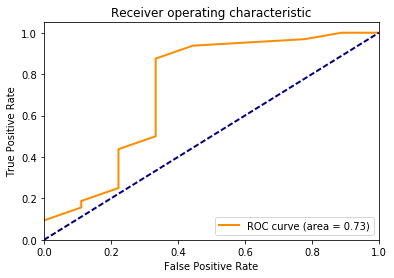

In [15]:
# classifying control vs sick for females
# sick is class 1
# fill = True, k = 1, fix = True, morePoints = True, proteins = None

clf = RandomForestClassifier(n_estimators=30, random_state=1)
print "Total Data Points: " + str(len(femaleSplit[0]) + len(femaleSplit[1]))
usefulFunctions.testBinaryClassifier(clf, femaleSplit[0], femaleSplit[1], testSize=0.33, k=2, morePoints=True)

Total Data Points: 216
Number of Training Data Points: 29
Number of Testing Data Points: 15
Accuracy scores: [0.33333333333333331, 0.53333333333333333, 0.53333333333333333, 0.53333333333333333, 0.53333333333333333, 0.53333333333333333, 0.59999999999999998, 0.59999999999999998, 0.59999999999999998, 0.73333333333333328]
Mean Accuracy: 0.553333333333
Median Accuracy: 0.533333333333
ROC Graph for Median trial


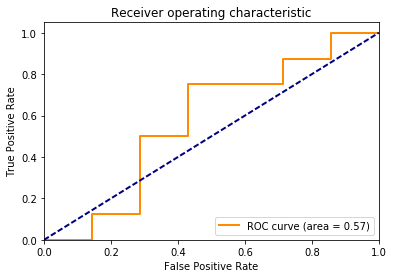

In [18]:
# classifying control vs sick for females
# sick is class 1
# fill = True, k = 2, fix = True, morePoints = False, proteins = None

clf = AdaBoostClassifier(n_estimators=100)
print "Total Data Points: " + str(len(femaleSplit[0]) + len(femaleSplit[1]))
usefulFunctions.testBinaryClassifier(clf, femaleSplit[0], femaleSplit[1], testSize=0.33, k=2)

Total Data Points: 216
Number of Training Data Points: 82
Number of Testing Data Points: 41
Accuracy scores: [0.6097560975609756, 0.68292682926829273, 0.70731707317073167, 0.73170731707317072, 0.75609756097560976, 0.75609756097560976, 0.78048780487804881, 0.78048780487804881, 0.85365853658536583, 0.85365853658536583]
Mean Accuracy: 0.751219512195
Median Accuracy: 0.756097560976
ROC Graph for Median trial


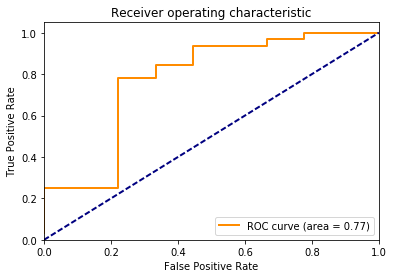

In [19]:
# classifying control vs sick for females
# sick is class 1
# fill = True, k = 1, fix = True, morePoints = True, proteins = None

clf = AdaBoostClassifier(n_estimators=100)
print "Total Data Points: " + str(len(femaleSplit[0]) + len(femaleSplit[1]))
usefulFunctions.testBinaryClassifier(clf, femaleSplit[0], femaleSplit[1], testSize=0.33, k=2, morePoints=True)